## Dataset Creation

In [24]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline
matplotlib.style.use('ggplot')

In [31]:
def getDataframe(filename):
    readFile = open(filename, 'r')
    reader = csv.reader(readFile)

    data = list()  
    for row in reader:
        data.append(row)
    readFile.close()

    df = pd.DataFrame.from_dict(data)
    df.columns = df.iloc[0]
    df = df[1:]
    df['RTT'] = pd.to_numeric(df['RTT'], downcast="float")
    df['MessageSize'] = pd.to_numeric(df['MessageSize'], downcast="integer")
    df['NumberOfMessages'] = pd.to_numeric(df['NumberOfMessages'], downcast="integer")
    df[df.columns[4]] = pd.to_numeric(df[df.columns[4]], downcast="integer")
    
    return df

In [26]:
def getBenchmark(benchmark):
    resultsFolder = "../credentials/results/Benchmark"+str(benchmark)+"/"
    resultsFiles = os.listdir(resultsFolder)

    df = getDataframe(resultsFolder+resultsFiles[0])
    for i in range(len(resultsFiles)-1):
        df = pd.concat([df, getDataframe(resultsFolder+resultsFiles[i+1])])
    return df
    

In [27]:
def plot_results(df, messagesComb, yerror, title, x_label, x_column):
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_title(title +'\n', fontsize=20)
    ax.set_ylabel('Média de RTT (ms)\n', fontsize=16)
    ax.set_xlabel('\n'+x_label, fontsize=16)
    legend = []
    
    for comb in messagesComb:
        legend.append("\nNº Mensagens: " + str(comb[1]) + "\nTamanho Mensagem: " + str(comb[0])+ '\n')
        exp = df[df.MessageSize == comb[0]]
        exp = exp[exp.NumberOfMessages == comb[1]]
        if yerror:
            plt.errorbar(exp[x_column], exp['RTT_mean'], yerr=exp['RTT_std'], fmt='--s')
        else:
             plt.errorbar(exp[x_column], exp['RTT_mean'], fmt='--s')
    
    ax.legend(legend, loc='upper right', bbox_to_anchor=(1.36 , 1.015), fontsize=12)
    fig.tight_layout()

As funções abaixo servem para fazer uma aprocimação otimizadas dos gráficos gerados.

A função **funcE** aproxima a curva para uma exponencial, e **funcL** aproxima para uma reta.

In [5]:
def funcE(x, a, b, c):
    return b*np.exp(a*x) + c

def funcL(x, a, b):
    return a*x + b

## Dataset Statistics

In [19]:
df = getBenchmark(5)

In [20]:
print("Valores Máximos:",df.max()["RTT"])
print("Valores Mínimos:", df.min()["RTT"])
print("Valores Médios:", df.mean()["RTT"])
print("Valores Desvio:", df.std()["RTT"])

Valores Máximos: 27.0
Valores Mínimos: 0.0
Valores Médios: 0.329204
Valores Desvio: 1.32056


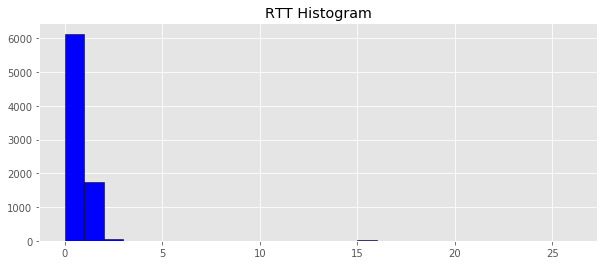

In [21]:
plt.figure(figsize=(10,4))
plt.hist(df['RTT'], bins=range(int(df.min()["RTT"]),int(df.max()["RTT"]),1), 
         histtype='bar', ec='black', color='blue')
plt.title("RTT Histogram")
plt.show()

## Benchmark 1

In [49]:
df = getBenchmark(1)
df = df.groupby(['NumberOfHosts', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,NumberOfHosts,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,8,1,1000,0.068211,0.0,2.0,0.258290
1,8,1,2000,0.071965,0.0,2.0,0.262281
2,8,1,4000,0.095488,0.0,5.0,0.308945
3,8,1000,1000,0.078793,0.0,6.0,0.282394
4,8,1000,2000,0.107196,0.0,7.0,0.358592
5,8,1000,4000,0.107705,0.0,7.0,0.355431
6,8,10000,1000,0.324610,0.0,10.0,0.786682
7,8,10000,2000,0.334524,0.0,12.0,0.738698
8,8,10000,4000,0.319008,0.0,24.0,0.715775
9,9,1,1000,0.069945,0.0,2.0,0.262803


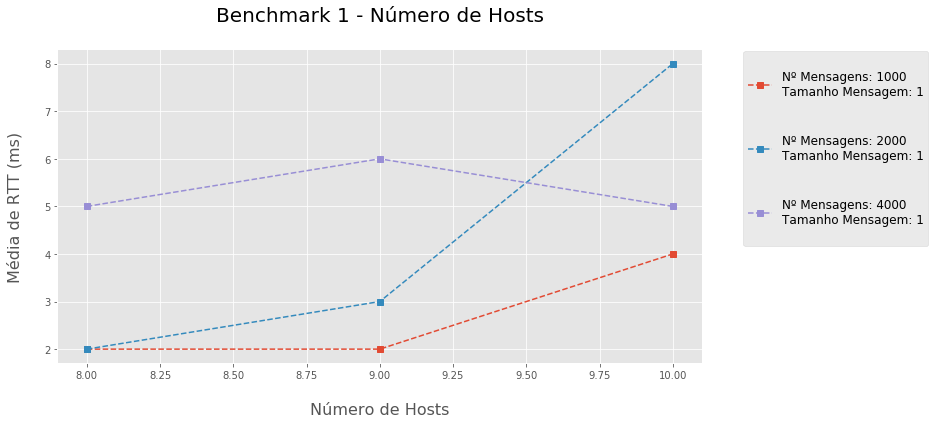

In [50]:
messagesComb = [(1,1000),(1,2000),(1,4000)]
plot_results(df, messagesComb, False,
             'Benchmark 1 - Número de Hosts', 
             'Número de Hosts', 
             'NumberOfHosts')

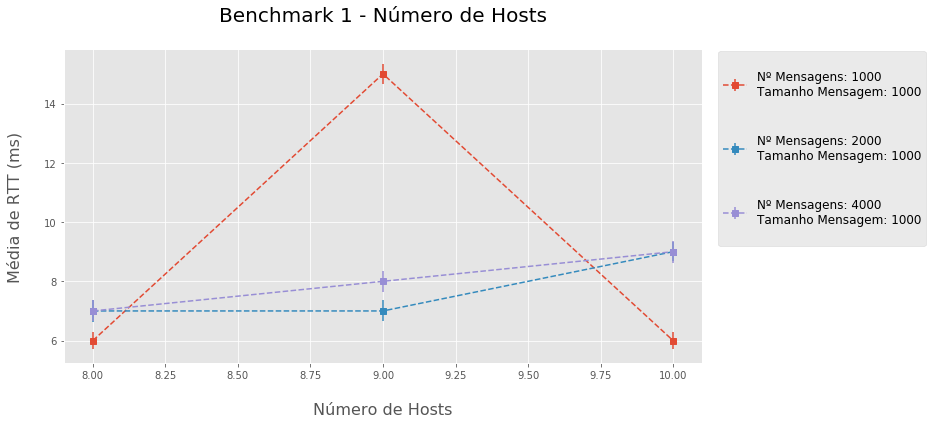

In [51]:
messagesComb = [(1000,1000), (1000,2000),(1000,4000)]
plot_results(df, messagesComb, True,
             'Benchmark 1 - Número de Hosts', 
             'Número de Hosts', 
             'NumberOfHosts')

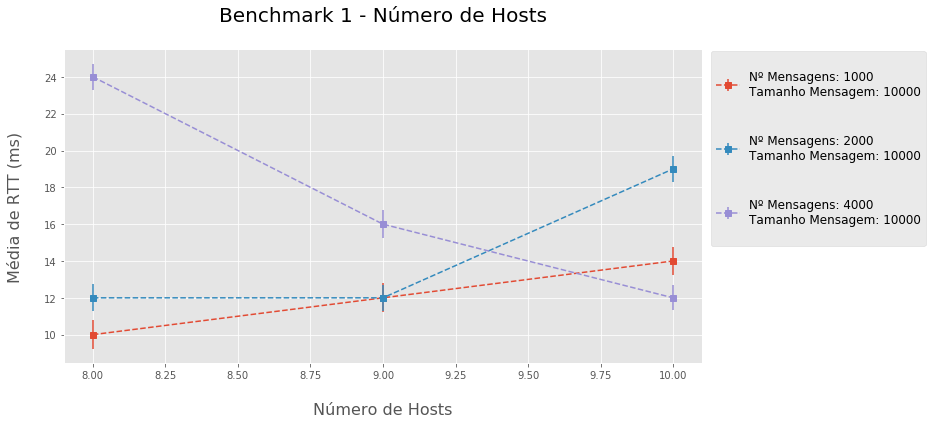

In [52]:
messagesComb = [(10000,1000), (10000,2000),(10000,4000)]
plot_results(df, messagesComb, True,
             'Benchmark 1 - Número de Hosts', 
             'Número de Hosts', 
             'NumberOfHosts')

## Benchmark 2

In [206]:
df = getBenchmark(2)
df = df.groupby(['NumberOfSender', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,NumberOfSender,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,1,1,1000,0.3310,0.0,9.0,0.760274
1,1,1,2000,0.2490,0.0,14.0,0.697311
2,1,1000,1000,0.3420,0.0,8.0,0.705361
3,1,1000,2000,0.2775,0.0,12.0,0.694791
4,2,1,1000,0.3130,0.0,12.0,0.819575
5,2,1,2000,0.2360,0.0,10.0,0.549049
6,2,1000,1000,0.3300,0.0,13.0,0.842502
7,2,1000,2000,0.2605,0.0,16.0,0.779707
8,3,1,1000,0.3470,0.0,14.0,0.940998
9,3,1,2000,0.2440,0.0,12.0,0.676530


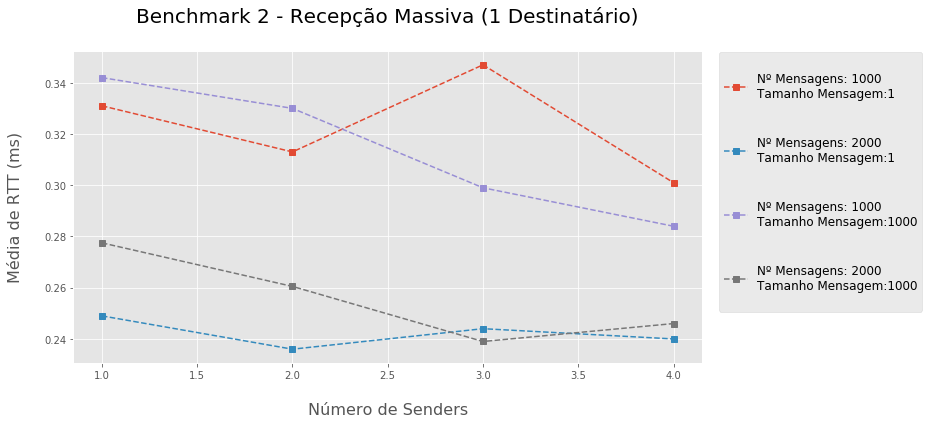

In [207]:
messagesComb = [(1,1000),(1,2000),(1000,1000),(1000,2000)]
plot_results(df, messagesComb,  False,
            'Benchmark 2 - Recepção Massiva (1 Destinatário)', 
            'Número de Senders', 
            'NumberOfSender')

## Benchmark 3

In [208]:
df = getBenchmark(3)
# df = df[df['RTT']>0]
df = df.groupby(['NumberOfPairs', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,NumberOfPairs,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,2,1,1000,0.3190,0.0,10.0,0.722330
1,2,1,2000,0.2435,0.0,18.0,0.737889
2,2,1000,1000,0.3120,0.0,15.0,0.829062
3,2,1000,2000,0.2380,0.0,14.0,0.617695
4,3,1,1000,0.2870,0.0,8.0,0.590745
5,3,1,2000,0.2590,0.0,19.0,0.850459
6,3,1000,1000,0.3150,0.0,11.0,0.682819
7,3,1000,2000,0.2530,0.0,14.0,0.729560
8,4,1,1000,0.3030,0.0,13.0,0.652393
9,4,1,2000,0.2485,0.0,11.0,0.617202


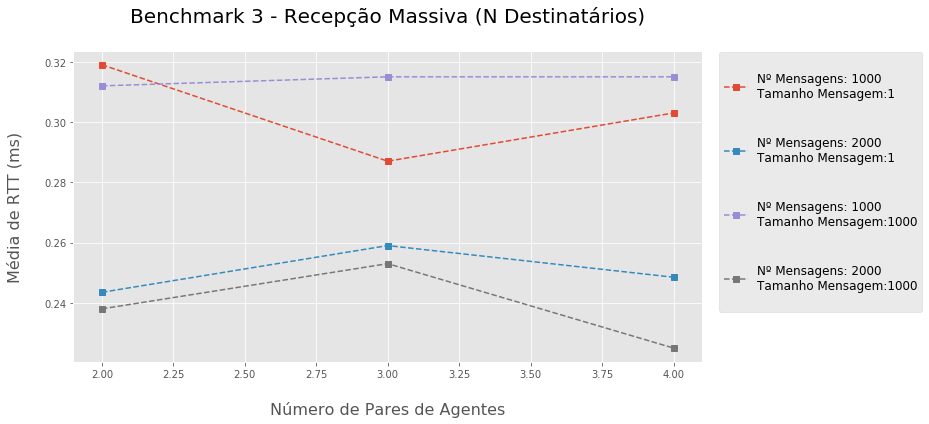

In [209]:
messagesComb = [(1,1000),(1,2000),(1000,1000),(1000,2000)]
plot_results(df, messagesComb,  False,
            'Benchmark 3 - Recepção Massiva (N Destinatários)', 
            'Número de Pares de Agentes', 
            'NumberOfPairs')

## Benchmark 4 - InterPlataforma

In [38]:
df = getBenchmark(4)
df = df.groupby(['AgentsPerHost', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,AgentsPerHost,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,10,1,1000,0.071071,0.0,2.0,0.260941
1,10,1000,1000,0.076076,0.0,1.0,0.265253
2,20,1,1000,0.058058,0.0,2.0,0.242384
3,20,1000,1000,0.121121,0.0,13.0,0.564785
4,30,1,1000,0.123123,0.0,4.0,0.458559
5,30,1000,1000,0.101101,0.0,13.0,0.543488
6,40,1,1000,0.092092,0.0,8.0,0.489906
7,40,1000,1000,0.101101,0.0,11.0,0.566949
8,50,1,1000,0.299299,0.0,5.0,0.784053
9,50,1000,1000,0.069069,0.0,9.0,0.450155


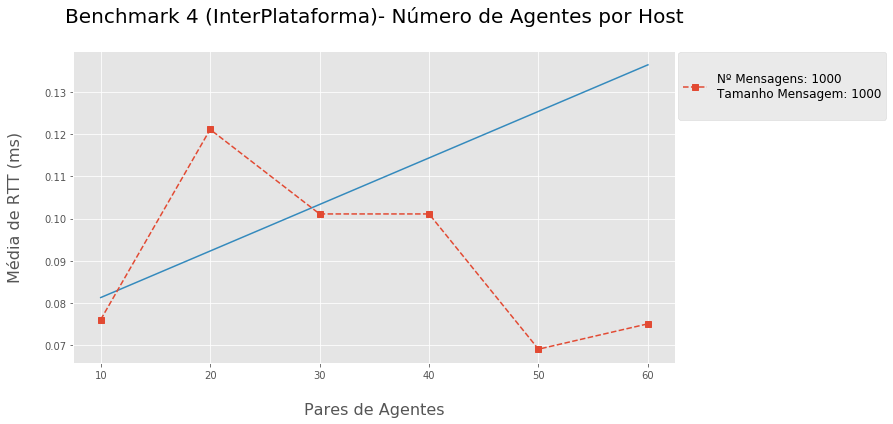

In [40]:
func = funcL

messagesComb = [(1000,1000)]
plot_results(df, messagesComb, False,
            'Benchmark 4 (InterPlataforma)- Número de Agentes por Host', 
            'Pares de Agentes', 
            'AgentsPerHost')

popt, pcov = curve_fit(funcL, df['AgentsPerHost'], df['RTT_mean'])

xdata = np.linspace(10, 60, 100)
plt.plot(xdata, func(xdata, *popt))

## Benchmark 4 - IntraPlataforma

In [32]:
df = getBenchmark(5)
df = df.groupby(['AgentsPerHost', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,AgentsPerHost,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,30,1000,5000,0.389078,0.0,42.0,1.605952
1,60,1000,5000,0.251850,0.0,29.0,1.153133


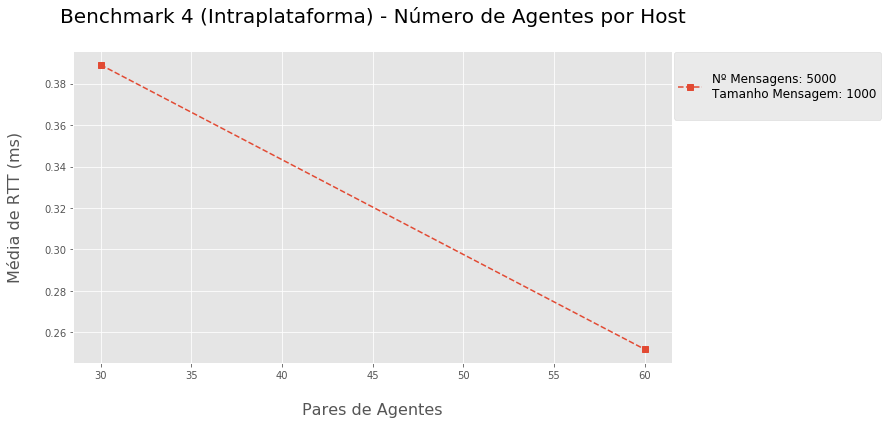

In [34]:
func = funcL

messagesComb = [(1000,5000)]
plot_results(df, messagesComb, False,
            'Benchmark 4 (Intraplataforma) - Número de Agentes por Host', 
            'Pares de Agentes', 
            'AgentsPerHost')

# popt, pcov = curve_fit(func, df['AgentsPerHost'], df['RTT_mean'])

# xdata = np.linspace(5, 60, 100)
# plt.plot(xdata, func(xdata, *popt))

In [214]:
print(popt)

[  0.10492307  41.83802179 -64.29615843]
